# 0. 데이터 불러오기 #

In [1]:
# 라이브러리
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# User dataset
df_user = pd.read_csv('/content/drive/MyDrive/Wello+project_신희택,윤다솜/Data/유저데이터 샘플리스트 셔플(AIB전달용) - user_sample_encode.csv')
df_user.head()

,num,mb_sex,mb_birth,mb_1,mb_2,mb_3,mb_4,mb_5,mb_6,mb_7,mb_8,mb_9,mb_10,mb_11,mb_12,mb_13,mb_14,mb_15
0,11726,M,19000101,충북/청주시,충북/청주시,기타,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21745,M,19000122,경기/고양시,경기/고양시,대학(원) 졸업,근로자,세대주,미혼,없다,no,no,해당없음,해당없음,중위소득 100% 이상,no,no,"취업 지원,근로자 지원,문화생활 지원,주택-부동산 지원"
2,13327,M,19050101,경남/양산시,경남/양산시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23542,M,19190101,경기/여주시,경기/여주시,대학(원) 졸업,근로자,세대주,기혼,있다,1명,영아,해당없음,해당없음,중위소득 80~100% 사이,no,no,"의료 지원,보육지원(만0~7세),성인교육지원,개인금융지원,기업금융지원,근로자 지원,..."
4,14442,M,19200128,대전/유성구,대전/유성구,고등학교 졸업,대학(원)생,세대원,미혼,없다,no,no,해당없음,해당없음,NaN,no,no,교육지원(만8~19세)


# I. EDA #

## 0. 데이터 확인 ##

In [4]:
df_user.shape # 데이터셋 크기

(20010, 18)

In [5]:
df_user.columns # 특성

Index(['num', 'mb_sex', 'mb_birth', 'mb_1', 'mb_2', 'mb_3', 'mb_4', 'mb_5',
       'mb_6', 'mb_7', 'mb_8', 'mb_9', 'mb_10', 'mb_11', 'mb_12', 'mb_13',
       'mb_14', 'mb_15'],
      dtype='object')

In [6]:
df_user.info() # 데이터타입

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20010 entries, 0 to 20009
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   num       20010 non-null  int64 
 1   mb_sex    20010 non-null  object
 2   mb_birth  20010 non-null  int64 
 3   mb_1      20010 non-null  object
 4   mb_2      20010 non-null  object
 5   mb_3      19524 non-null  object
 6   mb_4      18967 non-null  object
 7   mb_5      18497 non-null  object
 8   mb_6      18450 non-null  object
 9   mb_7      18312 non-null  object
 10  mb_8      18306 non-null  object
 11  mb_9      18302 non-null  object
 12  mb_10     17624 non-null  object
 13  mb_11     17270 non-null  object
 14  mb_12     14827 non-null  object
 15  mb_13     18095 non-null  object
 16  mb_14     18099 non-null  object
 17  mb_15     16140 non-null  object
dtypes: int64(2), object(16)
memory usage: 2.7+ MB


1. df_user.shape = (20010, 18)
2. df_user 칼럼 설명
    * index: index
    * num: 일련번호 (int)
    * mb_sex: 성별 (object)
        * M: 남성, F: 여성
    * mb_birth: 생년월일 (int)
    * mb_1: 주소 (시, 도 / 시, 군, 구) (object)
    * mb_2: 관심지역 (시, 도 / 시, 군, 구) (object)
    * mb_3: 최종학력 (object)
        * 고졸, 대학(원) 재, 대학(원) 휴, 대학(원) 졸, 기타
    * mb_4: 직장정보 (object)
        * 대학(원)생, 구직자, 근로자, 예비창업자, 프리랜서, 기업인/소상공인, 기타
    * mb_5: 가구원 유형 (object)
        * 세대주, 세대원
    * mb_6: 결혼여부 (object)
        * 미혼, 기혼
    * mb_7: 자녀 (object)
        * 있다. 없다
    * mb_8: 자녀 명수 (자녀 있다 선택 시) (object) 
        * 1명, 2명, 3명 이상
    * mb_9: 자녀정보 (자녀 명수 선택 시) (object)
        * 영아(만 0 ~ 3세), 유아(만 4 ~ 6세), 초등학생, 중학생, 고등학생, 성인
    * mb_10: 특수상황 (object)
        * 해당없음
        * 저소득층, 농축수산인, 장애인, 환자, 한부모/조손 가정, 입양 가정, 다문화 가정, 다자녀 가정, 독거노인, 북한이탈주민, 소년소녀가장, 구호구제대상자, 보훈대상 및 가족
    * mb_11: 예정상황 (object)
        * 해당없음
        * 입대 예정, 제대 예정, 결혼 예정, 임신 예정, 출생 예정, 구직 예정, 은퇴 예정
    * mb_12: 소득정보 (object)
        * 기초생활수급자, 40%이하, 40 ~ 60%, 60 ~ 80%, 80 ~ 100%, 100% 이상
    * mb_13: 특수상황(장애) (object)
        * 지체, 시각, 청각, 언어, 지적, 뇌병변, 자폐성, 정신, 신장, 심장, 호흡기, 간, 안면, 장루, 간질, 기타)
        * 한부모/조손가정
        * 해당없음
    * mb_14: 특수상황(보훈대상 및 가족) (object)
        * 해당없음
        * 국가유공자, 참전유공자, 고엽제 후유(의)증, 독립유공자, 제대군인, 5.18 민주유공자, 보훈보상대상자, 특수임무 유공자
    * mb_15: 관심분야 (object)
        * 의료지원, 만 0 ~ 7세 지원, 만 8 ~ 19세 지원, 성인교육지원, 개인금융지원, 기업금융지원, 창업지원, 취업지원, 근로자 지원, 문화생활 지원, 주택-부동산 지원

In [7]:
# 데이터 결측치 처리
df_user['mb_3'] = df_user['mb_3'].fillna('기타') # study
df_user['mb_4'] = df_user['mb_4'].fillna('기타') # job
df_user['mb_5'] = df_user['mb_5'].fillna('해당없음') # house owner
df_user['mb_6'] = df_user['mb_6'].fillna('해당없음') # marriage
df_user['mb_7'] = df_user['mb_7'].fillna('없다') # 자녀
df_user['mb_8'] = df_user['mb_8'].fillna('no') # 자녀 명수
df_user.loc[df_user['mb_8']=='no', 'mb_8'] = '해당없음'
df_user['mb_9'] = df_user['mb_9'].fillna('no') # 자녀 연령대
df_user.loc[df_user['mb_9']=='no', 'mb_9'] = '해당없음'
df_user['mb_10'] = df_user['mb_10'].fillna('해당없음') # 특수상황
df_user['mb_11'] = df_user['mb_11'].fillna('해당없음') # 예정상황
df_user['mb_12'] = df_user['mb_12'].fillna('해당없음') # 소득
df_user['mb_13'] = df_user['mb_13'].fillna('해당없음') # 질병/장애
df_user.loc[df_user['mb_13']=='no', 'mb_13'] = '해당없음'
df_user['mb_14'] = df_user['mb_14'].fillna('해당없음') # 보훈
df_user.loc[df_user['mb_14']=='no', 'mb_14'] = '해당없음'
df_user['mb_15'] = df_user['mb_15'].fillna('해당없음') # 필요 키워드

In [8]:
# 데이터 변환
## df_user['mb_birth']: int -> datetime
df_user['mb_birth'] = df_user['mb_birth'].astype(str)
df_user['mb_birth'] = pd.to_datetime(df_user['mb_birth']) # yyyy-mm-dd 형태로 출력
# mb_1, mb_2를 [도(시), 시(군, 구)]형태로 변환
# '/'를 기준으로 분리
df_user['mb_1'] = df_user.mb_1.str.split('/')
df_user['mb_2'] = df_user.mb_2.str.split('/')
df_user.head()
# mb_4, 9, 10, 11, 13, 14, 15를 리스트 형태로 변환
# ','를 기준으로 분리
df_user['mb_4'] = df_user.mb_4.str.split(',')
df_user['mb_9'] = df_user.mb_9.str.split(',')
df_user['mb_10'] = df_user.mb_10.str.split(',')
df_user['mb_11'] = df_user.mb_11.str.split(',')
df_user['mb_13'] = df_user.mb_13.str.split(',')
df_user['mb_14'] = df_user.mb_14.str.split(',')
df_user['mb_15'] = df_user.mb_15.str.split(',')

In [9]:
df_user.head()

,num,mb_sex,mb_birth,mb_1,mb_2,mb_3,mb_4,mb_5,mb_6,mb_7,mb_8,mb_9,mb_10,mb_11,mb_12,mb_13,mb_14,mb_15
0,11726,M,1900-01-01,"[충북, 청주시]","[충북, 청주시]",기타,[기타],해당없음,해당없음,없다,해당없음,[해당없음],[해당없음],[해당없음],해당없음,[해당없음],[해당없음],[해당없음]
1,21745,M,1900-01-22,"[경기, 고양시]","[경기, 고양시]",대학(원) 졸업,[근로자],세대주,미혼,없다,해당없음,[해당없음],[해당없음],[해당없음],중위소득 100% 이상,[해당없음],[해당없음],"[취업 지원, 근로자 지원, 문화생활 지원, 주택-부동산 지원]"
2,13327,M,1905-01-01,"[경남, 양산시]","[경남, 양산시]",기타,[기타],해당없음,해당없음,없다,해당없음,[해당없음],[해당없음],[해당없음],해당없음,[해당없음],[해당없음],[해당없음]
3,23542,M,1919-01-01,"[경기, 여주시]","[경기, 여주시]",대학(원) 졸업,[근로자],세대주,기혼,있다,1명,[영아],[해당없음],[해당없음],중위소득 80~100% 사이,[해당없음],[해당없음],"[의료 지원, 보육지원(만0~7세), 성인교육지원, 개인금융지원, 기업금융지원, 근..."
4,14442,M,1920-01-28,"[대전, 유성구]","[대전, 유성구]",고등학교 졸업,[대학(원)생],세대원,미혼,없다,해당없음,[해당없음],[해당없음],[해당없음],해당없음,[해당없음],[해당없음],[교육지원(만8~19세)]


In [10]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20010 entries, 0 to 20009
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   num       20010 non-null  int64         
 1   mb_sex    20010 non-null  object        
 2   mb_birth  20010 non-null  datetime64[ns]
 3   mb_1      20010 non-null  object        
 4   mb_2      20010 non-null  object        
 5   mb_3      20010 non-null  object        
 6   mb_4      20010 non-null  object        
 7   mb_5      20010 non-null  object        
 8   mb_6      20010 non-null  object        
 9   mb_7      20010 non-null  object        
 10  mb_8      20010 non-null  object        
 11  mb_9      20010 non-null  object        
 12  mb_10     20010 non-null  object        
 13  mb_11     20010 non-null  object        
 14  mb_12     20010 non-null  object        
 15  mb_13     20010 non-null  object        
 16  mb_14     20010 non-null  object        
 17  mb_15     20

이상치 확인 \
나이 부분에서 이상치 확인이 필요함.

In [11]:
from datetime import datetime

In [12]:
# mb_age column 추가
df_user['mb_age'] = 0
df_user.head()

,num,mb_sex,mb_birth,mb_1,mb_2,mb_3,mb_4,mb_5,mb_6,mb_7,mb_8,mb_9,mb_10,mb_11,mb_12,mb_13,mb_14,mb_15,mb_age
0,11726,M,1900-01-01,"[충북, 청주시]","[충북, 청주시]",기타,[기타],해당없음,해당없음,없다,해당없음,[해당없음],[해당없음],[해당없음],해당없음,[해당없음],[해당없음],[해당없음],0
1,21745,M,1900-01-22,"[경기, 고양시]","[경기, 고양시]",대학(원) 졸업,[근로자],세대주,미혼,없다,해당없음,[해당없음],[해당없음],[해당없음],중위소득 100% 이상,[해당없음],[해당없음],"[취업 지원, 근로자 지원, 문화생활 지원, 주택-부동산 지원]",0
2,13327,M,1905-01-01,"[경남, 양산시]","[경남, 양산시]",기타,[기타],해당없음,해당없음,없다,해당없음,[해당없음],[해당없음],[해당없음],해당없음,[해당없음],[해당없음],[해당없음],0
3,23542,M,1919-01-01,"[경기, 여주시]","[경기, 여주시]",대학(원) 졸업,[근로자],세대주,기혼,있다,1명,[영아],[해당없음],[해당없음],중위소득 80~100% 사이,[해당없음],[해당없음],"[의료 지원, 보육지원(만0~7세), 성인교육지원, 개인금융지원, 기업금융지원, 근...",0
4,14442,M,1920-01-28,"[대전, 유성구]","[대전, 유성구]",고등학교 졸업,[대학(원)생],세대원,미혼,없다,해당없음,[해당없음],[해당없음],[해당없음],해당없음,[해당없음],[해당없음],[교육지원(만8~19세)],0


In [13]:
for i in range(len(df_user['mb_age'])):
    today = datetime.today()
    y = today.year
    m = today.month
    d = today.day
    if df_user['mb_birth'][i].month < m:
        df_user['mb_age'][i] = y - df_user['mb_birth'][i].year
    elif df_user['mb_birth'][i].month == m:
        if df_user['mb_birth'][i].day <= d:
            df_user['mb_age'][i] = y - df_user['mb_birth'][i].year
        elif df_user['mb_birth'][i].day > d:
            df_user['mb_age'][i] = y - df_user['mb_birth'][i].year - 1
    elif df_user['mb_birth'][i].month > m:
        df_user['mb_age'][i] = y - df_user['mb_birth'][i].year - 1
df_user.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,num,mb_sex,mb_birth,mb_1,mb_2,mb_3,mb_4,mb_5,mb_6,mb_7,mb_8,mb_9,mb_10,mb_11,mb_12,mb_13,mb_14,mb_15,mb_age
0,11726,M,1900-01-01,"[충북, 청주시]","[충북, 청주시]",기타,[기타],해당없음,해당없음,없다,해당없음,[해당없음],[해당없음],[해당없음],해당없음,[해당없음],[해당없음],[해당없음],121
1,21745,M,1900-01-22,"[경기, 고양시]","[경기, 고양시]",대학(원) 졸업,[근로자],세대주,미혼,없다,해당없음,[해당없음],[해당없음],[해당없음],중위소득 100% 이상,[해당없음],[해당없음],"[취업 지원, 근로자 지원, 문화생활 지원, 주택-부동산 지원]",121
2,13327,M,1905-01-01,"[경남, 양산시]","[경남, 양산시]",기타,[기타],해당없음,해당없음,없다,해당없음,[해당없음],[해당없음],[해당없음],해당없음,[해당없음],[해당없음],[해당없음],116
3,23542,M,1919-01-01,"[경기, 여주시]","[경기, 여주시]",대학(원) 졸업,[근로자],세대주,기혼,있다,1명,[영아],[해당없음],[해당없음],중위소득 80~100% 사이,[해당없음],[해당없음],"[의료 지원, 보육지원(만0~7세), 성인교육지원, 개인금융지원, 기업금융지원, 근...",102
4,14442,M,1920-01-28,"[대전, 유성구]","[대전, 유성구]",고등학교 졸업,[대학(원)생],세대원,미혼,없다,해당없음,[해당없음],[해당없음],[해당없음],해당없음,[해당없음],[해당없음],[교육지원(만8~19세)],101


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_sex = pd.DataFrame(df_user['mb_sex'].value_counts())
df_sex

,mb_sex
M,12465
F,7545


In [16]:
df_user['mb_sex'].value_counts(normalize=True)

M    0.622939
F    0.377061
Name: mb_sex, dtype: float64

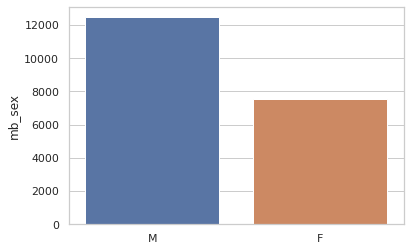

In [17]:
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=df_sex.index, y='mb_sex', data=df_sex)
plt.show()

In [18]:
df_user['mb_age'].value_counts()

18     3065
19     1562
17     1494
21     1481
22     1337
       ... 
80        1
99        1
116       1
76        1
79        1
Name: mb_age, Length: 71, dtype: int64

<function matplotlib.pyplot.show>

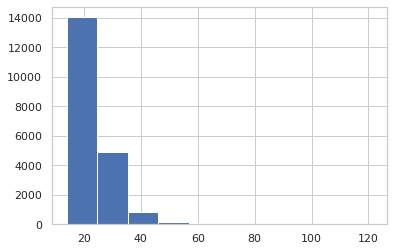

In [19]:
# 데이터 분포형태 확인
# 연령대
plt.hist(df_user['mb_age'])
plt.show

In [20]:
def age_categorize(age):
    age = (age // 10) * 10
    return age

In [21]:
mb_age_category = df_user.mb_age.apply(age_categorize)
mb_age_category

0        120
1        120
2        110
3        100
4        100
        ... 
20005     10
20006     10
20007     10
20008     10
20009     10
Name: mb_age, Length: 20010, dtype: int64

In [22]:
mb_age_category = mb_age_category.astype('category')
mb_age_category

0        120
1        120
2        110
3        100
4        100
        ... 
20005     10
20006     10
20007     10
20008     10
20009     10
Name: mb_age, Length: 20010, dtype: category
Categories (12, int64): [10, 20, 30, 40, ..., 90, 100, 110, 120]

In [23]:
len(df_user.columns)

19

In [24]:
df_user.insert(19,'mb_age_category',mb_age_category)
df_user.head()

,num,mb_sex,mb_birth,mb_1,mb_2,mb_3,mb_4,mb_5,mb_6,mb_7,mb_8,mb_9,mb_10,mb_11,mb_12,mb_13,mb_14,mb_15,mb_age,mb_age_category
0,11726,M,1900-01-01,"[충북, 청주시]","[충북, 청주시]",기타,[기타],해당없음,해당없음,없다,해당없음,[해당없음],[해당없음],[해당없음],해당없음,[해당없음],[해당없음],[해당없음],121,120
1,21745,M,1900-01-22,"[경기, 고양시]","[경기, 고양시]",대학(원) 졸업,[근로자],세대주,미혼,없다,해당없음,[해당없음],[해당없음],[해당없음],중위소득 100% 이상,[해당없음],[해당없음],"[취업 지원, 근로자 지원, 문화생활 지원, 주택-부동산 지원]",121,120
2,13327,M,1905-01-01,"[경남, 양산시]","[경남, 양산시]",기타,[기타],해당없음,해당없음,없다,해당없음,[해당없음],[해당없음],[해당없음],해당없음,[해당없음],[해당없음],[해당없음],116,110
3,23542,M,1919-01-01,"[경기, 여주시]","[경기, 여주시]",대학(원) 졸업,[근로자],세대주,기혼,있다,1명,[영아],[해당없음],[해당없음],중위소득 80~100% 사이,[해당없음],[해당없음],"[의료 지원, 보육지원(만0~7세), 성인교육지원, 개인금융지원, 기업금융지원, 근...",102,100
4,14442,M,1920-01-28,"[대전, 유성구]","[대전, 유성구]",고등학교 졸업,[대학(원)생],세대원,미혼,없다,해당없음,[해당없음],[해당없음],[해당없음],해당없음,[해당없음],[해당없음],[교육지원(만8~19세)],101,100


In [25]:
age_category_df = pd.DataFrame(df_user['mb_age_category'].value_counts())
age_category_df = age_category_df.sort_index()
age_category_df

,mb_age_category
10,7588
20,9365
30,2556
40,322
50,121
60,37
70,11
80,2
90,1
100,4


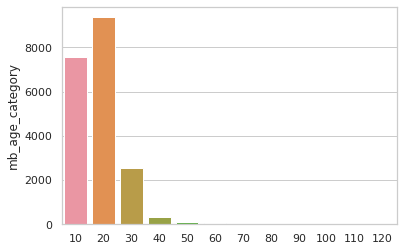

In [26]:
sns.set_theme(style='whitegrid')
ax = sns.barplot(x=age_category_df.index, y='mb_age_category', data=age_category_df)
plt.show()

In [27]:
df_user['mb_4'].value_counts()

TypeError: ignored

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[기타]                                     7064
[근로자]                                    4133
[대학(원)생]                                 3008
[구직자]                                    2569
[프리랜서]                                    541
                                         ... 
[대학(원)생, 근로자, 예비창업자, 프리랜서, 기업인/소상공인]        1
[구직자, 근로자, 예비창업자, 프리랜서, 기업인/소상공인, 기타]       1
[대학(원)생, 구직자, 기업인/소상공인, 기타]                 1
[구직자, 기업인/소상공인, 기타]                         1
[대학(원)생, 구직자, 예비창업자, 프리랜서, 기타]              1
Name: mb_4, Length: 98, dtype: int64

In [28]:
# mb_4: [대학(원)생, 구직자, 근로자, 예비창업자, 프리랜서, 기업인/소상공인, 기타]
college_student_cnt = 0 # 대학(원)생
job_seeker_cnt = 0 # 구직자
worker_cnt = 0 # 근로자
prep_entrepreneur_cnt = 0 # 예비창업자
freelancer_cnt = 0 # 프리랜서
business_person_cnt = 0 # 기업인/소상공인
etc_cnt = 0 # 기타 value_count

for i in df_user['mb_4']:
    for j in i:
        if j == '대학(원)생':
            college_student_cnt += 1
        elif j == '구직자':
            job_seeker_cnt += 1
        elif j == '근로자':
            worker_cnt += 1
        elif j == '예비창업자':
            prep_entrepreneur_cnt += 1
        elif j == '프리랜서':
            freelancer_cnt += 1
        elif j == '기업인/소상공인':
            business_person_cnt += 1
        elif j == '기타':
            etc_cnt += 1

college_student_cnt, job_seeker_cnt, worker_cnt, prep_entrepreneur_cnt, freelancer_cnt, business_person_cnt, etc_cnt

(4103, 3779, 5287, 491, 1051, 441, 7839)

In [29]:
mb_4_df = pd.DataFrame({'현재상황': ['대학(원)생', '구직자', '근로자', '예비창업자', '프리랜서', '기업인/소상공인', '기타'], 'mb_4': [4103, 3779, 5287, 491, 1051, 441, 7839]})
mb_4_df

,현재상황,mb_4
0,대학(원)생,4103
1,구직자,3779
2,근로자,5287
3,예비창업자,491
4,프리랜서,1051
5,기업인/소상공인,441
6,기타,7839


In [30]:
mb_4_df = mb_4_df.set_index('현재상황')
mb_4_df

,mb_4
현재상황,
대학(원)생,4103
구직자,3779
근로자,5287
예비창업자,491
프리랜서,1051
기업인/소상공인,441
기타,7839


In [31]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


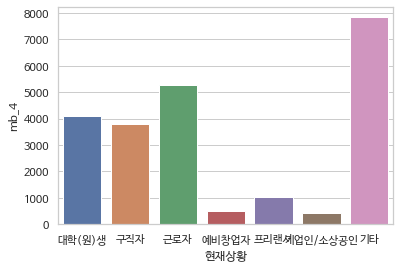

In [32]:
sns.set_theme(style='whitegrid')
plt.rc('font', family='NanumBarunGothic')
ax = sns.barplot(x=mb_4_df.index, y='mb_4', data=mb_4_df)
plt.show()

In [33]:
# mb_9(자녀 연령): - 영아, 유아, 초등학생, 중학생, 고등학생, 성인
baby_cnt = 0 # 영아
child_cnt = 0 # 유아
schoolchild_cnt = 0 # 초등학생
middle_school_cnt = 0 # 중학생
high_school_cnt = 0 # 고등학생
adult_cnt = 0 # 성인

for i in df_user['mb_9']:
    for j in i:
        if j == '영아':
            baby_cnt += 1
        elif j == '유아':
            child_cnt += 1
        elif j == '초등학생':
            schoolchild_cnt += 1
        elif j == '중학생':
            middle_school_cnt += 1
        elif j == '고등학생':
            high_school_cnt += 1
        elif j == '성인':
            adult_cnt += 1

mb_9_df = pd.DataFrame({'ans':['영아','유아','초등학생','중학생','고등학생','성인'],
                        'kid_status':[baby_cnt, child_cnt, schoolchild_cnt, middle_school_cnt, high_school_cnt, adult_cnt]})
mb_9_df = mb_9_df.set_index('ans')
mb_9_df

,kid_status
ans,
영아,478
유아,322
초등학생,296
중학생,100
고등학생,103
성인,159


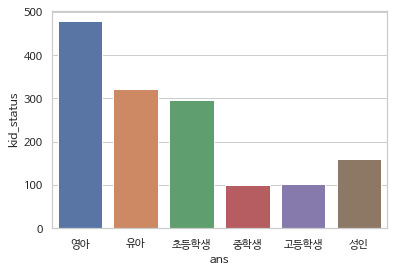

In [34]:
sns.set_theme(style='whitegrid')
plt.rc('font', family='NanumBarunGothic')
ax = sns.barplot(x=mb_9_df.index, y='kid_status', data=mb_9_df)
plt.show()

In [35]:
# mb_10(특수상황): 해당없음, 저소득층, 농축수산인, 장애인, 환자, 한부모/조손 가정, 입양 가정, 다문화 가정, 다자녀 가정, 독거노인, 북한이탈주민, 소년소녀가장, 구호구제대상자, 보훈대상 및 가족
no_cnt = 0 # 해당없음
low_income_cnt = 0 # 저소득층
farmer_cnt = 0 # 농축수산인
disabled_cnt = 0 # 장애인
patient_cnt = 0 # 환자
single_parent_cnt = 0 # 한부모/조손 가정
adoption_cnt = 0 # 입양 가정
multicultural_cnt = 0 # 다문화 가정
multichild_cnt = 0 # 다자녀 가정
senior_cnt = 0 # 독거노인
north_cnt = 0 # 북한이탈주민
child_without_parent_cnt = 0 # 소년소녀가장
aid_cnt = 0 # 구호구제 대상자
veteran_cnt = 0 # 보훈대상 및 가족

for i in df_user['mb_10']:
    for j in i:
        if j == '해당없음':
            no_cnt += 1
        elif j == '저소득층':
            low_income_cnt += 1
        elif j == '농축수산인':
            farmer_cnt += 1
        elif j == '장애인':
            disabled_cnt += 1
        elif j == '환자':
            patient_cnt += 1
        elif j == '한부모/조손 가정':
            single_parent_cnt += 1
        elif j == '입양 가정':
            adoption_cnt += 1
        elif j == '다문화 가정':
            multicultural_cnt += 1
        elif j == '다자녀 가정':
            multichild_cnt += 1
        elif j == '독거노인':
            senior_cnt += 1
        elif j == '북한이탈주민':
            north_cnt += 1
        elif j == '소년소녀가장':
            child_without_parent_cnt += 1
        elif j == '구호구제대상자':
            aid_cnt += 1
        elif j == '보훈대상 및 가족':
            veteran_cnt += 1

mb_10_df = pd.DataFrame({'ans':['해당없음', '저소득층', '농축수산인','장애인','환자','한부모/조손 가정', '입양 가정', '다문화 가정', '다자녀 가정', '독거노인', '북한이탈주민', '소년소녀가장', '구호구제대상자', '보훈대상 및 가족'],
                         'family_status':[no_cnt, low_income_cnt, farmer_cnt, disabled_cnt, patient_cnt, single_parent_cnt, adoption_cnt, multicultural_cnt, multichild_cnt, senior_cnt, north_cnt, child_without_parent_cnt, aid_cnt, veteran_cnt]})
mb_10_df = mb_10_df.set_index('ans')
mb_10_df

,family_status
ans,
해당없음,14077
저소득층,2604
농축수산인,100
장애인,282
환자,135
한부모/조손 가정,2242
입양 가정,28
다문화 가정,241
다자녀 가정,1654


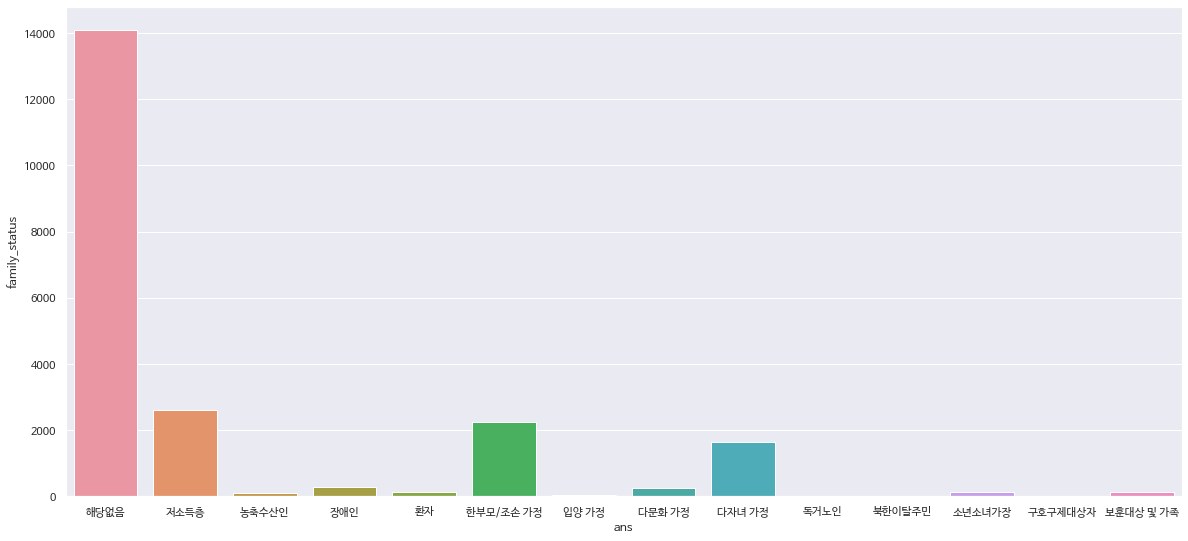

In [36]:
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(20,9)})
plt.rc('font', family='NanumBarunGothic')
ax = sns.barplot(x=mb_10_df.index, y='family_status', data=mb_10_df)
plt.show()

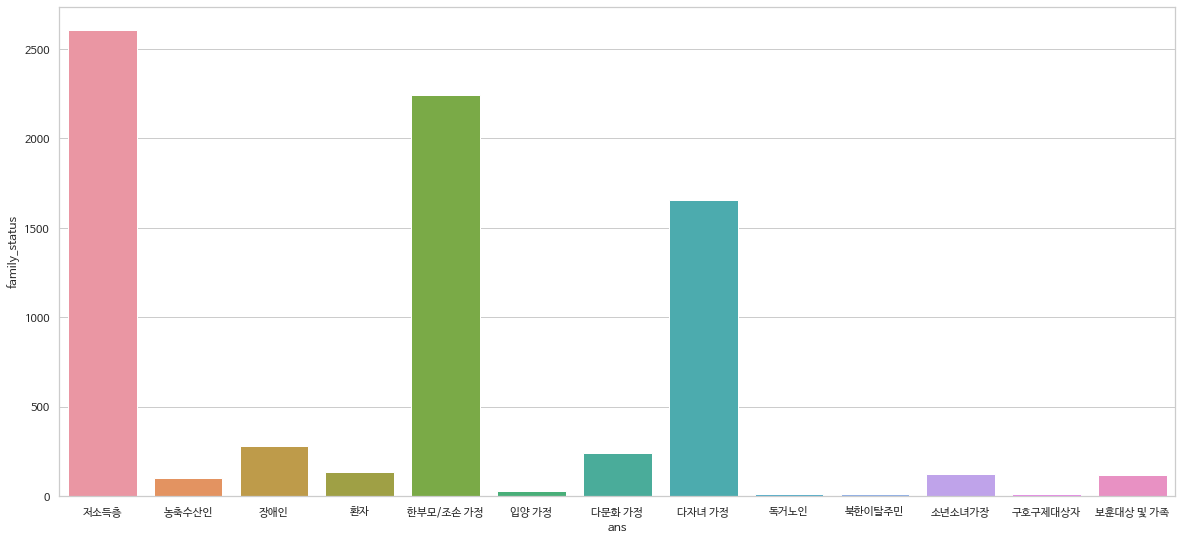

In [47]:
mb_10_df_drop = mb_10_df.drop('해당없음')
mb_10_df_drop

#sns.set_theme(style='whitegrid')
#sns.set(rc = {'figure.figsize':(20,9)})
plt.rc('font', family='NanumBarunGothic')
ax = sns.barplot(x=mb_10_df_drop.index, y='family_status', data=mb_10_df_drop)
plt.show()

In [37]:
# mb_11(job_status) : ['해당없음', '입대 예정', '제대 예정', '결혼 예정', '임신 예정', '출생 예정', '구직 예정', '은퇴 예정']
na_cnt_11 = 0 # 해당없음
duty_cnt_11 = 0 # 입대 예정
discharge_cnt_11 = 0 # 제대 예정
marriage_cnt_11 = 0 # 결혼 예정
pregnancy_cnt_11 = 0 # 임신 예정
childbirth_cnt_11 = 0 # 출산 예정
job_seeking_cnt_11 = 0 # 구직 예정
retire_cnt_11 = 0 # 은퇴 예정

for i in df_user['mb_11']:
    for j in i:
        if j == '해당없음':
            na_cnt_11 += 1
        elif j == '입대 예정':
            duty_cnt_11 += 1
        elif j == '제대 예정':
            discharge_cnt_11 += 1
        elif j == '결혼 예정':
            marriage_cnt_11 += 1
        elif j == '임신 예정':
            pregnancy_cnt_11 += 1
        elif j == '출산 예정':
            childbirth_cnt_11 += 1
        elif j == '구직 예정':
            job_seeking_cnt_11 += 1
        elif j == '은퇴 예정':
            retire_cnt_11 += 1

mb_11_df = pd.DataFrame({'ans': ['해당없음', '입대 예정', '제대 예정', '결혼 예정', '임신 예정', '출생 예정', '구직 예정', '은퇴 예정'],
                         'job_status': [na_cnt_11, duty_cnt_11, discharge_cnt_11, marriage_cnt_11, pregnancy_cnt_11, childbirth_cnt_11, job_seeking_cnt_11, retire_cnt_11]})
mb_11_df = mb_11_df.set_index('ans')
mb_11_df

,job_status
ans,
해당없음,14267
입대 예정,1525
제대 예정,517
결혼 예정,735
임신 예정,225
출생 예정,0
구직 예정,3221
은퇴 예정,128


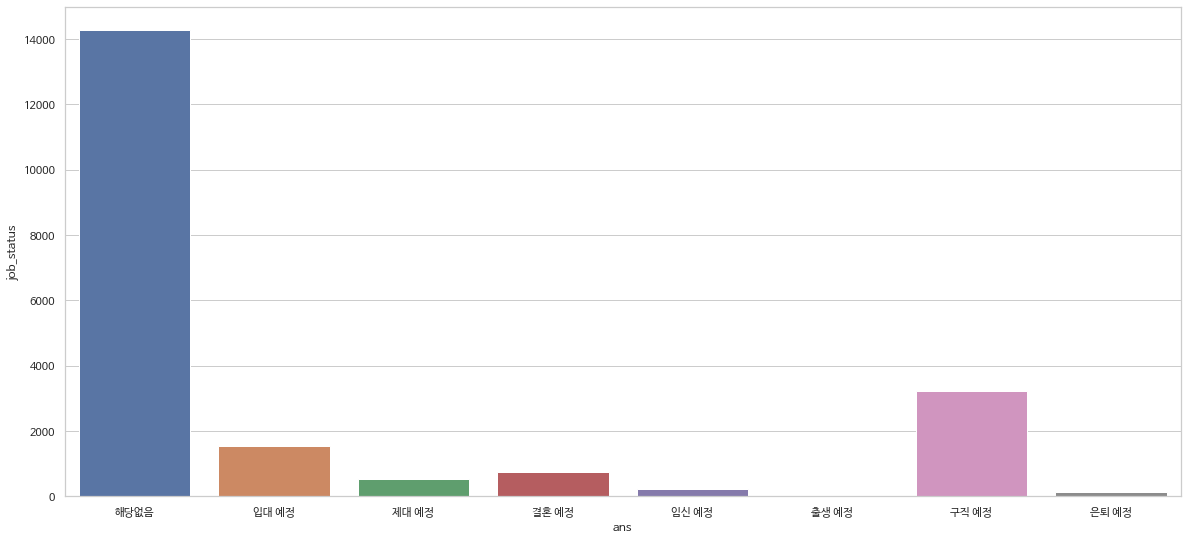

In [38]:
sns.set_theme(style='whitegrid')
#sns.set(rc = {'figure.figsize':(20,9)})
plt.rc('font', family='NanumBarunGothic')
ax = sns.barplot(x=mb_11_df.index, y='job_status', data=mb_11_df)
plt.show()

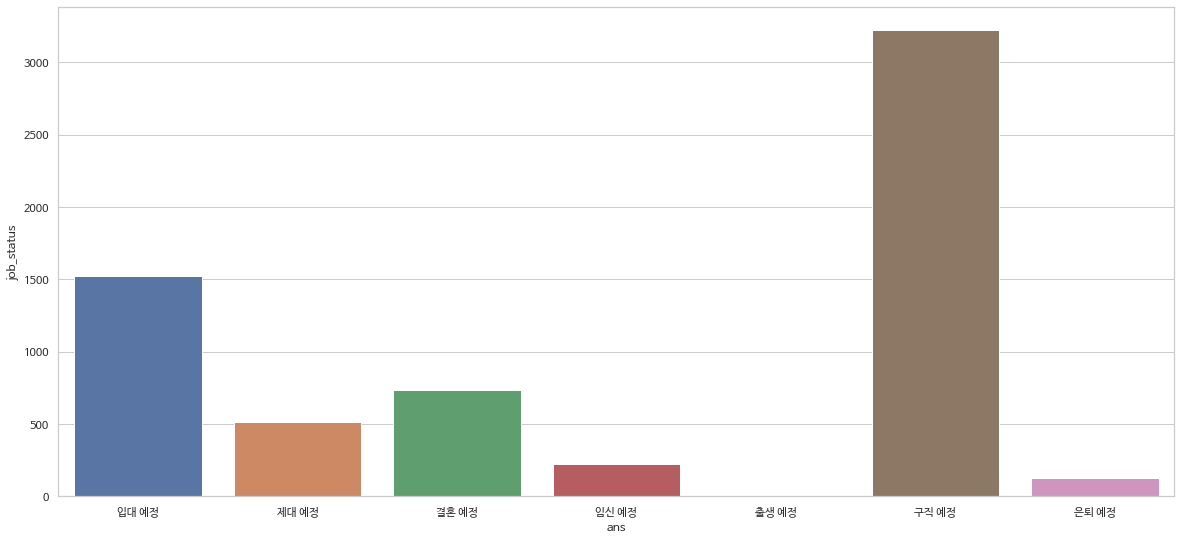

In [48]:
mb_11_df_drop = mb_11_df.drop('해당없음')

#sns.set_theme(style='whitegrid')
#sns.set(rc = {'figure.figsize':(20,9)})
plt.rc('font', family='NanumBarunGothic')
ax = sns.barplot(x=mb_11_df_drop.index, y='job_status', data=mb_11_df_drop)
plt.show()

In [39]:
# mb_13(illness): ['해당없음','한부모/조손 가정','지체','시각','청각','언어','지적','뇌병변','자폐성','정신','신장','심장','호흡기','간','안면','장루','간질','기타']
na_cnt_13 = 0 #해당없음
single_parent_cnt_13 = 0 #한부모/조손 가정
physical_cnt_13 = 0 #지체
visual_cnt_13 = 0 #시각
hearing_cnt_13 = 0 #청각
language_cnt_13 = 0 #언어
weak_minded_cnt_13 = 0 #지적
brain_cnt_13 = 0 #뇌병변
autism_cnt_13 = 0 #자폐성
mental_cnt_13 = 0 #정신
kidney_cnt_13 = 0 #신장
heart_cnt_13 = 0 #심장
respiratory_cnt_13 = 0 #호흡기
liver_cnt_13 = 0 #간
face_cnt_13 = 0 #안면
entrostomy_cnt_13 = 0 #장루
epilepsy_cnt_13 = 0 #간질
etc_cnt_13 = 0 # 기타

for i in df_user['mb_13']:
    for j in i:
        if j == '해당없음':
            na_cnt_13 += 1
        elif j == '한부모/조손 가정':
            single_parent_cnt_13 += 1
        elif j == '지체':
            physical_cnt_13 += 1
        elif j == '시각':
            visual_cnt_13 += 1
        elif j == '청각':
            hearing_cnt_13 += 1
        elif j == '언어':
            language_cnt_13 += 1
        elif j == '지적':
            weak_minded_cnt_13 += 1
        elif j == '뇌병변':
            brain_cnt_13 += 1
        elif j == '자폐성':
            autism_cnt_13 += 1
        elif j == '정신':
            mental_cnt_13 += 1
        elif j == '신장':
            kidney_cnt_13 += 1
        elif j == '심장':
            heart_cnt_13 += 1
        elif j == '호흡기':
            respiratory_cnt_13 += 1
        elif j == '간':
            liver_cnt_13 += 1
        elif j == '안면':
            face_cnt_13 += 1
        elif j == '장루':
            entrostomy_cnt_13 += 1
        elif j == '간질':
            epilepsy_cnt_13 += 1
        elif j == '기타':
            etc_cnt_13 += 1

mb_13_df = pd.DataFrame({'ans': ['해당없음','한부모/조손 가정','지체','시각','청각','언어','지적','뇌병변','자폐성','정신','신장','심장','호흡기','간','안면','장루','간질','기타'],
                         'illness': [na_cnt_13, single_parent_cnt_13, physical_cnt_13, visual_cnt_13, hearing_cnt_13, language_cnt_13, weak_minded_cnt_13, brain_cnt_13, autism_cnt_13, mental_cnt_13, kidney_cnt_13, heart_cnt_13, respiratory_cnt_13, liver_cnt_13, face_cnt_13, entrostomy_cnt_13, epilepsy_cnt_13, etc_cnt_13]})
mb_13_df = mb_13_df.set_index('ans')
mb_13_df

,illness
ans,
해당없음,19758
한부모/조손 가정,81
지체,61
시각,16
청각,34
언어,19
지적,0
뇌병변,31
자폐성,13


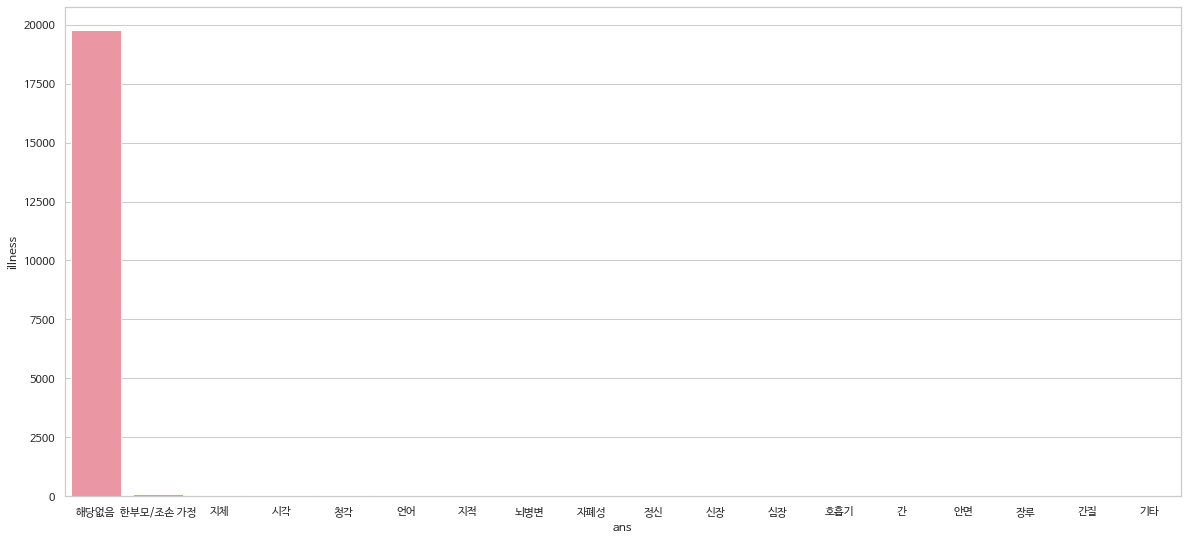

In [40]:
#sns.set_theme(style='whitegrid')
#sns.set(rc = {'figure.figsize':(20,9)})
plt.rc('font', family='NanumBarunGothic')
ax = sns.barplot(x=mb_13_df.index, y='illness', data=mb_13_df)
plt.show()

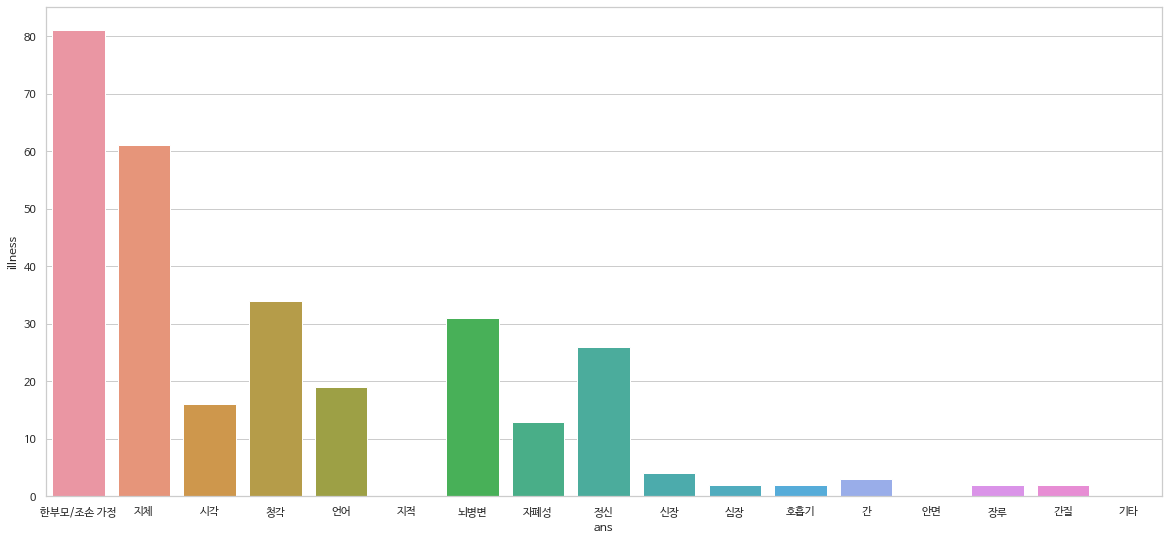

In [49]:
mb_13_df_drop = mb_13_df.drop('해당없음')

#sns.set_theme(style='whitegrid')
#sns.set(rc = {'figure.figsize':(20,9)})
plt.rc('font', family='NanumBarunGothic')
ax = sns.barplot(x=mb_13_df_drop.index, y='illness', data=mb_13_df_drop)
plt.show()

In [41]:
# mb_14(mil_award): ['해당없음','국가유공자','참전유공자','고엽제 후유(의)증','독립유공자','제대군인','5.18 민주유공자','보훈보상대상자',특수임무유공자']
na_cnt_14 = 0 #해당없음
national_cnt_14 = 0 #국가유공자
war_cnt_14 = 0 #참전유공자
defoliant_cnt_14 = 0 #고엽제 후유(의)증
independence_cnt_14 = 0 #독립유공자
discharge_cnt_14 = 0 #제대군인
democracy_cnt_14 = 0 #5.18 민주유공자
reward_cnt_14 = 0 #보훈보상대상자
special_cnt_14 = 0 #특수임무유공자

for i in df_user['mb_14']:
    for j in i:
        if j == '해당없음':
            na_cnt_14 += 1
        elif j == '국가유공자':
            national_cnt_14 += 1
        elif j == '참전유공자':
            war_cnt_14 += 1
        elif j == '고엽제 후유(의)증':
            defoliant_cnt_14 += 1
        elif j == '독립유공자':
            independence_cnt_14 += 1
        elif j == '제대군인':
            discharge_cnt_14 += 1
        elif j == '5.18 민주유공자':
            democracy_cnt_14 += 1
        elif j == '보훈보상대상자':
            reward_cnt_14 += 1
        elif j == '특수임무유공자':
            special_cnt_14 += 1

mb_14_df = pd.DataFrame({'ans':['해당없음','국가유공자','참전유공자','고엽제 후유(의)증','독립유공자','제대군인','5.18 민주유공자','보훈보상대상자','특수임무유공자'],
                         'mil_award': [na_cnt_14, national_cnt_14, war_cnt_14, defoliant_cnt_14, independence_cnt_14, discharge_cnt_14, democracy_cnt_14, reward_cnt_14, special_cnt_14]})
mb_14_df = mb_14_df.set_index('ans')
mb_14_df

,mil_award
ans,
해당없음,19920
국가유공자,61
참전유공자,8
고엽제 후유(의)증,3
독립유공자,1
제대군인,3
5.18 민주유공자,2
보훈보상대상자,27
특수임무유공자,3


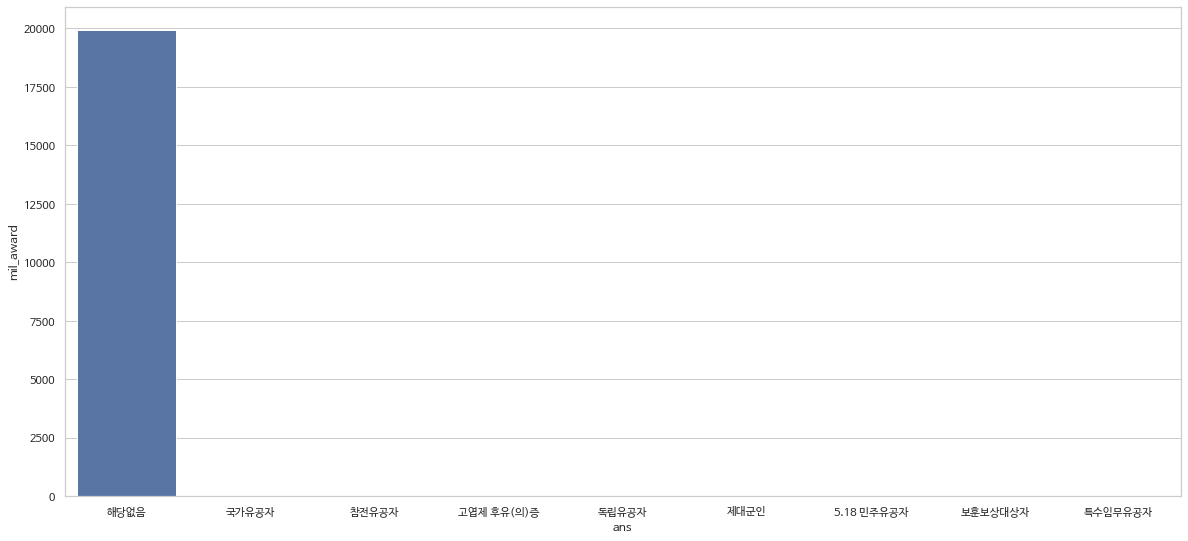

In [42]:
plt.rc('font', family='NanumBarunGothic')
ax = sns.barplot(x=mb_14_df.index, y='mil_award', data=mb_14_df)
plt.show()

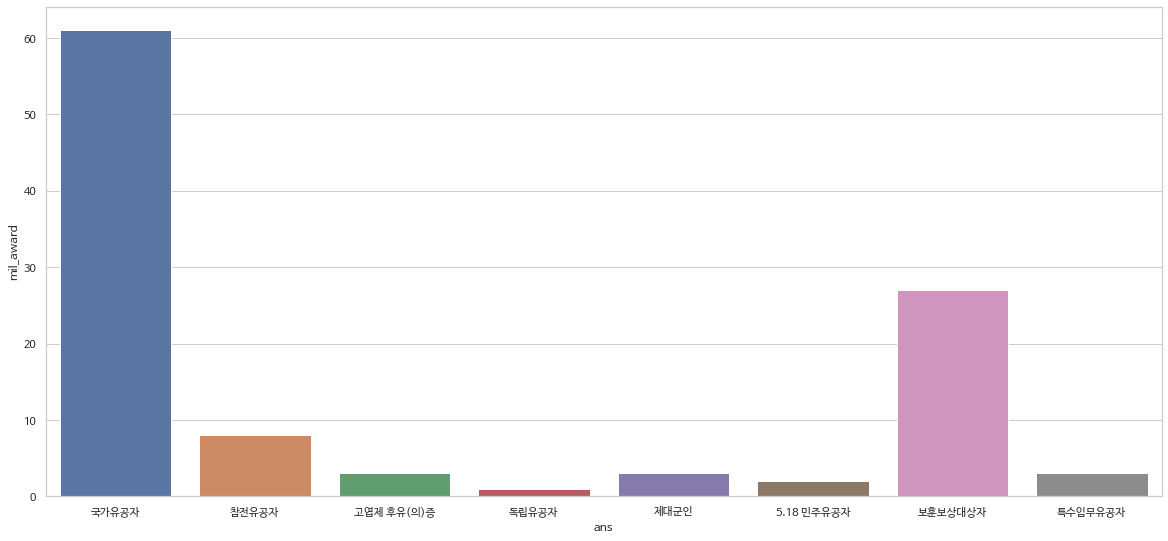

In [50]:
mb_14_df_drop = mb_14_df.drop('해당없음')

#sns.set_theme(style='whitegrid')
#sns.set(rc = {'figure.figsize':(20,9)})
plt.rc('font', family='NanumBarunGothic')
ax = sns.barplot(x=mb_14_df_drop.index, y='mil_award', data=mb_14_df_drop)
plt.show()

In [43]:
#mb_15(support): ['해당없음','의료 지원','보육지원(만0~7세)','교육지원(만8~19세)','성인교육지원','개인금융지원','기업금융지원','창업 지원','취업 지원','근로자 지원','문화생활 지원','주택-부동산 지원']
na_cnt_15 = 0 #해당없음
medical_cnt_15 = 0 #의료지원
care_cnt_15 = 0 #보육지원
edu_cnt_15 = 0 #교육지원
edu_adult_cnt_15 = 0 #성인교육지원
ind_finance_cnt_15 = 0 #개인금융지원
com_finance_cnt_15 = 0 #기업금융지원
found_cnt_15 = 0 #창업지원
job_cnt_15 = 0 #취업지원
labor_cnt_15 = 0 #근로자지원
culture_cnt_15 = 0 #문화생활 지원
housing_cnt_15 = 0 #주택-부동산 지원

for i in df_user['mb_15']:
    for j in i:
        if j == '해당없음':
            na_cnt_15 += 1
        elif j == '의료 지원':
            medical_cnt_15 += 1
        elif j == '보육지원(만0~7세)':
            care_cnt_15 += 1
        elif j == '교육지원(만8~19세)':
            edu_cnt_15 += 1
        elif j == '성인교육지원':
            edu_adult_cnt_15 += 1
        elif j == '개인금융지원':
            ind_finance_cnt_15 += 1
        elif j == '기업금융지원':
            com_finance_cnt_15 += 1
        elif j == '창업 지원':
            found_cnt_15 += 1
        elif j == '취업 지원':
            job_cnt_15 += 1
        elif j == '근로자 지원':
            labor_cnt_15 += 1
        elif j == '문화생활 지원':
            culture_cnt_15 += 1
        elif j == '주택-부동산 지원':
            housing_cnt_15 += 1

mb_15_df = pd.DataFrame({'ans': ['해당없음','의료 지원','보육지원(만0~7세)','교육지원(만8~19세)','성인교육지원','개인금융지원','기업금융지원','창업 지원','취업 지원','근로자 지원','문화생활 지원','주택-부동산 지원'],
                         'support': [na_cnt_15, medical_cnt_15, care_cnt_15, edu_cnt_15, edu_adult_cnt_15, ind_finance_cnt_15, com_finance_cnt_15, found_cnt_15, job_cnt_15, labor_cnt_15, culture_cnt_15, housing_cnt_15]})
mb_15_df = mb_15_df.set_index('ans')
mb_15_df

,support
ans,
해당없음,3870
의료 지원,4308
보육지원(만0~7세),782
교육지원(만8~19세),4746
성인교육지원,4557
개인금융지원,6652
기업금융지원,2064
창업 지원,3214
취업 지원,7221


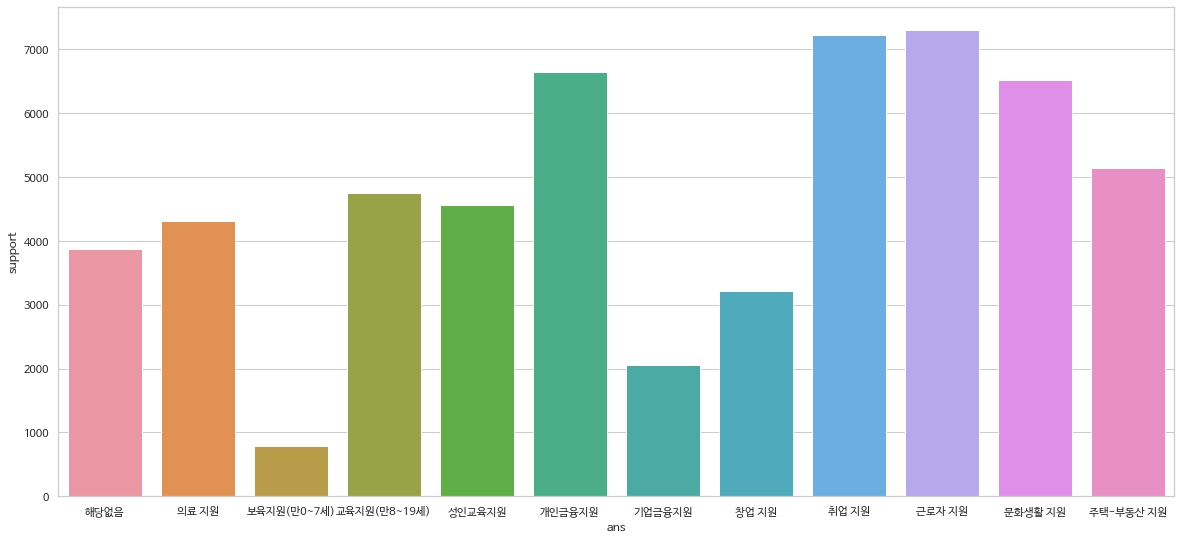

In [44]:
plt.rc('font', family='NanumBarunGothic')
ax = sns.barplot(x=mb_15_df.index, y='support', data=mb_15_df)
plt.show()

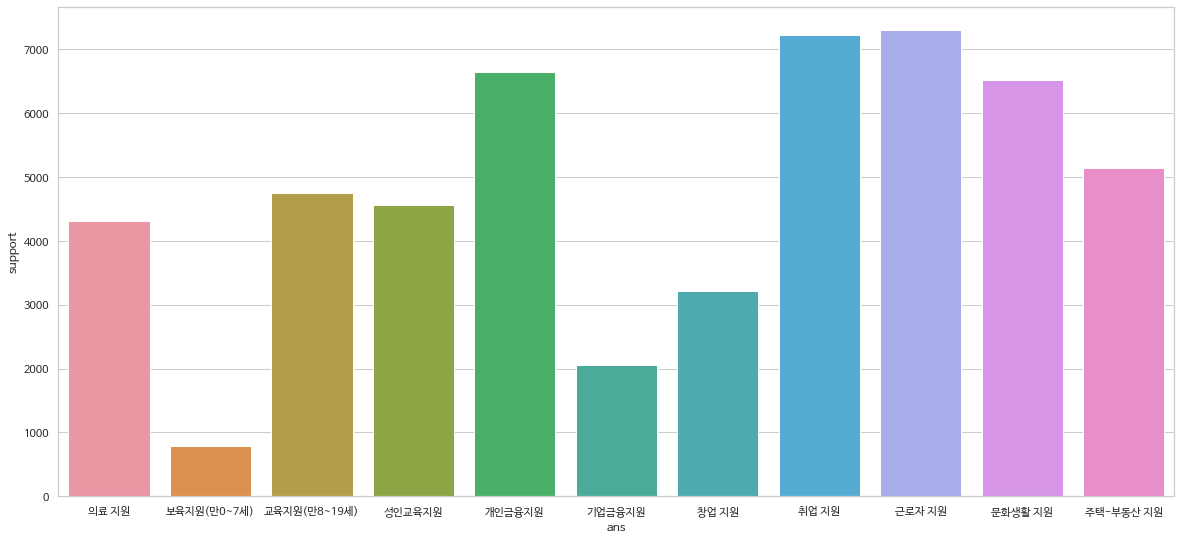

In [51]:
mb_15_df_drop = mb_15_df.drop('해당없음')

#sns.set_theme(style='whitegrid')
#sns.set(rc = {'figure.figsize':(20,9)})
plt.rc('font', family='NanumBarunGothic')
ax = sns.barplot(x=mb_15_df_drop.index, y='support', data=mb_15_df_drop)
plt.show()

In [45]:
df_user_eda = df_user[['num','mb_sex','mb_age','mb_1','mb_2','mb_3','mb_4','mb_5','mb_6','mb_7','mb_8','mb_9','mb_10','mb_11','mb_12','mb_13','mb_14','mb_15']]
df_user_eda.head()

,num,mb_sex,mb_age,mb_1,mb_2,mb_3,mb_4,mb_5,mb_6,mb_7,mb_8,mb_9,mb_10,mb_11,mb_12,mb_13,mb_14,mb_15
0,11726,M,121,"[충북, 청주시]","[충북, 청주시]",기타,[기타],해당없음,해당없음,없다,해당없음,[해당없음],[해당없음],[해당없음],해당없음,[해당없음],[해당없음],[해당없음]
1,21745,M,121,"[경기, 고양시]","[경기, 고양시]",대학(원) 졸업,[근로자],세대주,미혼,없다,해당없음,[해당없음],[해당없음],[해당없음],중위소득 100% 이상,[해당없음],[해당없음],"[취업 지원, 근로자 지원, 문화생활 지원, 주택-부동산 지원]"
2,13327,M,116,"[경남, 양산시]","[경남, 양산시]",기타,[기타],해당없음,해당없음,없다,해당없음,[해당없음],[해당없음],[해당없음],해당없음,[해당없음],[해당없음],[해당없음]
3,23542,M,102,"[경기, 여주시]","[경기, 여주시]",대학(원) 졸업,[근로자],세대주,기혼,있다,1명,[영아],[해당없음],[해당없음],중위소득 80~100% 사이,[해당없음],[해당없음],"[의료 지원, 보육지원(만0~7세), 성인교육지원, 개인금융지원, 기업금융지원, 근..."
4,14442,M,101,"[대전, 유성구]","[대전, 유성구]",고등학교 졸업,[대학(원)생],세대원,미혼,없다,해당없음,[해당없음],[해당없음],[해당없음],해당없음,[해당없음],[해당없음],[교육지원(만8~19세)]
